In [1]:
import matplotlib.pyplot as plt

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rc('font', size = 24)
plt.rcParams.update({'axes.labelsize': 'x-large',
                     'axes.titlesize': 'x-large',
                     'xtick.labelsize':'x-large',
                     'ytick.labelsize':'x-large',
                     'legend.fontsize':'x-large'})

%matplotlib inline

# The functions to read the spectra, define the class run and details are in
# run.py
import run as r
import plotting as pl

import os

## Access file where data is stored
home = os.getcwd()
home = home.replace('/PRD_1903.08585', '')   # remove PRD_1903.08585 in case it is the current directory already
dir0 = home + '/PRD_1903.08585/'
os.chdir(dir0)

In [21]:
# Define every run that we want to analyze and initialize the class run
# which also reads the spectra and the time series
runs = {}                           # Initialize dictionary for the different runs to be analyzed
def initialize_run(run_name):
    run = r.run(run_name, dir0)
    runs.update({run_name:run})
    
initialize_run('ini1')
initialize_run('ini2')
initialize_run('ini3')
initialize_run('hel1')
initialize_run('hel2')
initialize_run('hel3')
initialize_run('noh1')
initialize_run('noh2')
initialize_run('ac1')
initialize_run('ac2')
initialize_run('ac3')

Reading run ini1

Spectra computed: 
['GWh', 'mag', 'GWs', 'kin', 'helGWh', 'helGWs', 'helmag', 'helkin']


Reading run ini2

Spectra computed: 
['GWh', 'mag', 'GWs', 'kin', 'helGWh', 'helGWs', 'helmag', 'helkin']


Reading run ini3

Spectra computed: 
['GWh', 'mag', 'GWs', 'kin', 'helGWh', 'helGWs', 'helmag', 'helkin']


Reading run hel1

Spectra computed: 
['GWh', 'mag', 'GWs', 'SCL', 'kin', 'helGWh', 'helGWs', 'helmag', 'helkin']


Reading run hel2

Spectra computed: 
['Tpq', 'GWh', 'VCT', 'mag', 'GWs', 'SCL', 'Str', 'kin', 'helTpq', 'helVCT', 'helGWh', 'helGWs', 'helmag', 'helkin', 'helSCL', 'helStr']


Reading run hel3

Spectra computed: 
['GWh', 'mag', 'GWs', 'kin', 'helGWh', 'helGWs', 'helmag', 'helkin']


Reading run noh1

Spectra computed: 
['Tpq', 'GWh', 'VCT', 'mag', 'GWs', 'SCL', 'Str', 'kin', 'helTpq', 'helVCT', 'helGWh', 'helGWs', 'helmag', 'helkin', 'helSCL', 'helStr']


Reading run noh2

Spectra computed: 
['GWh', 'mag', 'GWs', 'kin', 'helGWh', 'helGWs', 'helmag', 'helk

In [22]:
# We can store the runs in variables run1, run2, ... for easier access
# These are all stored in the dictionary given for runs
ini1 = runs.get('ini1')
ini2 = runs.get('ini2')
ini3 = runs.get('ini3')
hel1 = runs.get('hel1')
hel2 = runs.get('hel2')
hel3 = runs.get('hel3')
noh1 = runs.get('noh1')
noh2 = runs.get('noh2')
ac1  = runs.get('ac1')
ac2  = runs.get('ac2')
ac3  = runs.get('ac3')

In [23]:
# The runs that have been read can be seen as follows
print([s for s in runs.keys()])

# To check the directories that are avaible one can run
r.read_dirs()

['ini1', 'ini2', 'ini3', 'hel1', 'hel2', 'hel3', 'noh1', 'noh2', 'ac1', 'ac2', 'ac3']


{'ini1': 'M1152e_exp6k4_M4b',
 'ini2': 'M1152e_exp6k4',
 'ini3': 'M1152e_exp6k4_k60b',
 'hel1': 'F1152d2_sig1_t11_M2c_double',
 'hel2': 'F1152a_sig1_t11d_double',
 'hel3': 'F1152a_sig1',
 'hel4': 'F1152a_k10_sig1',
 'noh1': 'F1152b_sig0_t11_M4',
 'noh2': 'F1152a_sig0_t11b',
 'ac1': 'E1152e_t11_M4d_double',
 'ac2': 'E1152e_t11_M4a_double',
 'ac3': 'E1152e_t11_M4e_double'}

In [24]:
# computes some characteristics of the run (as kf, OmMmax, vAmax, ...)
ini1.characterize_run(min_col=-2, max_col=-.9)
for i in runs:
    
    run = runs.get(i)
    if run.name_run != 'ini1':
        run.characterize_run(min_col=-2, max_col=-1.5)
    
# to see this, uncomment the following lines
print('The elements stored in ini2 are: ')
print([s for s in ini2.__dict__.keys()])

# The available quantities in time_series, as a function of time are
print('\n The elements stored in time series for ini2 are: ')
print([s for s in ini2.ts.keys()])

The elements stored in ini2 are: 
['name_run', 'dir_run', 'spectra', 'spectra_avail', 'ts', 'OmMmax', 'tini', 'color', 'kf', 'vA', 'te']

 The elements stored in time series for ini2 are: 
['it', 't', 'dt', 'EEK', 'EEM', 'EEGW', 'hrms', 'urms', 'brms', 'umax', 'bmax', 'hhTpt', 'hhXpt', 'bxpt', 'bypt', 'bzpt', 'uxpt', 'uypt', 'uzpt']


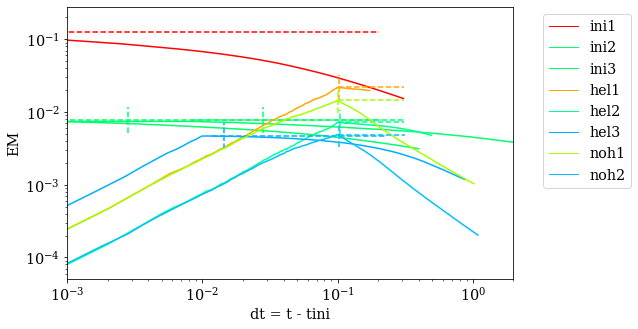

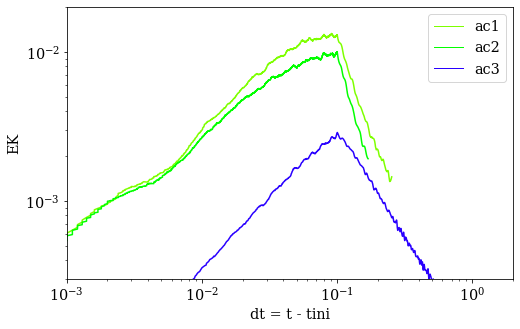

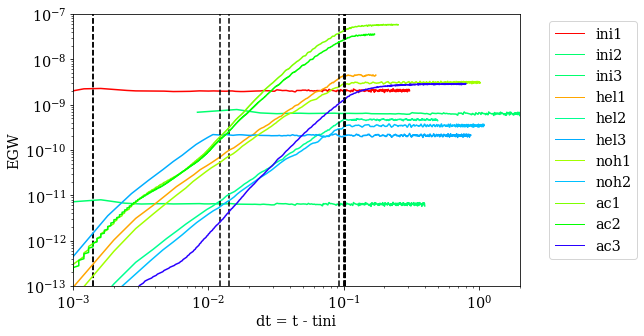

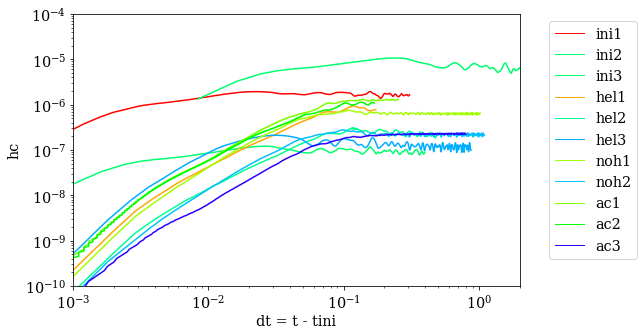

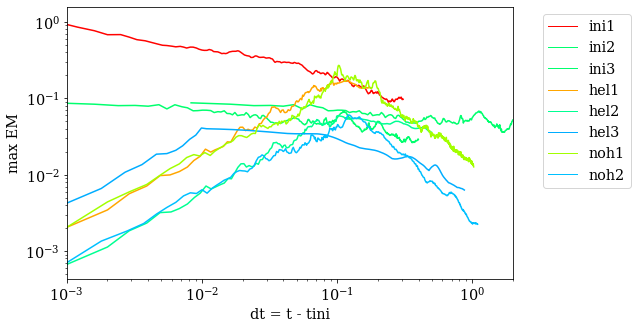

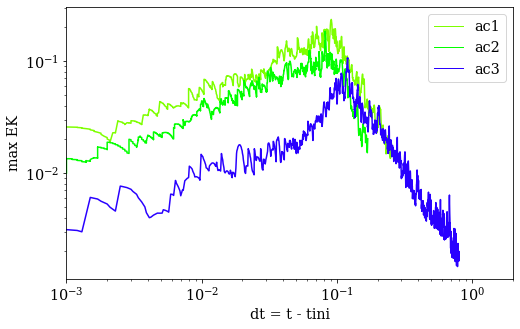

In [31]:
for i in runs:
    #j = pl.EEM_EEK_EEGW_vs_t(runs.get(i))
    
    j = pl.EEM_EEK_EEGW_vs_t(runs.get(i), lhc=True, lEKmax=True, lEMmax=True,
                     EGW0=1e-13, EGW1=1e-7, t0=1e-3, EK0=3e-4, EK1=2e-2, t1=2e0, hc0=1e-10, hc1=1e-4,
                     ET0=1e-6, ET1=0.2)
    

# Assign legend for plots (see cell below for clarification on colors)
legs, legs_m, legs_k, cl, cl_m, cl_k = pl.colors_runs(runs)
for i in range(1, j + 1):
    plt.figure(i)
    if i == 1 or i == 5:
        plt.legend(cl_m, legs_m, loc = 'best', bbox_to_anchor=(1.05, 1))
    elif i == 2 or i == 6:
        plt.legend(cl_k, legs_k, loc = 'best')
    elif i == 3 or i == 4:
        plt.legend(cl, legs, loc = 'best', bbox_to_anchor=(1.05, 1))
    else:
        plt.legend(cl, legs, loc = 'best')
    

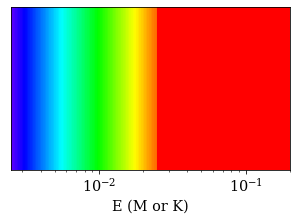

In [26]:
# The palette of colors used for the plot of the different runs is the following,
# where the initial energy density of the turbulent sourcing, determines the color of
# the corresponding lines
pl.palette_colors()